# Quiz 2 - GAN
Wyatt Blair

DUE: 5/5/2024

In [1]:
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import random

import sys
sys.path.append('../')

from data import get_data
from util import plot_data, evaluate_model

In [2]:
torch.manual_seed(0)
np.random.seed(0)
random.seed(0)

In [3]:
data = get_data()

___
## Generative Adversarial Network (GAN)

### Discriminator Weight Gradient
$\nabla_w D_w = \frac{1}{m} \sum_{i=1}^{m}[\log{D_w(x_i)} + \log{(1 - D_w(G_\theta(z_i)))}]$ 

        
$w :=$ weights of the discriminator 

$\theta :=$ weights of the generator 

$m :=$ number of samples in mini-batch 

$D_w :=$ discriminator using weights $w$. Output restricted to $[0, 1]$, indicating whether the discriminator believes the given image, $x$, is fake or real. 

$G_\theta :=$ generator using weights $\theta$. Output is an image which is designed to trick the discriminator. 

$x :=$ an image in the discriminator's input space 

$z :=$ a feature vector in the generator's input space 

### Generator Weight Gradient

$\nabla_\theta G_\theta = \frac{1}{m} \sum_{i=1}^{m}{\log{(1 - D_w(G_\theta(z_i)))}}$


Please refer to the Discriminator section above for a description of the variables.



In [4]:
# define model using PyTorch
class Generator(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):

        self.input_dim = input_dim

        super(Generator, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, output_dim)
        )
    
    def forward(self, x):
        return self.net(x)

class Discriminator(nn.Module):
    def __init__(self, input_dim, hidden_dim):
        super(Discriminator, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.LeakyReLU(0.2),
            nn.Linear(hidden_dim, hidden_dim),
            nn.LeakyReLU(0.2),
            nn.Linear(hidden_dim, 1),
            nn.Sigmoid()
        )
    
    def forward(self, x):
        return self.net(x)


Training GAN:   0%|          | 0/100 [00:00<?, ?it/s]

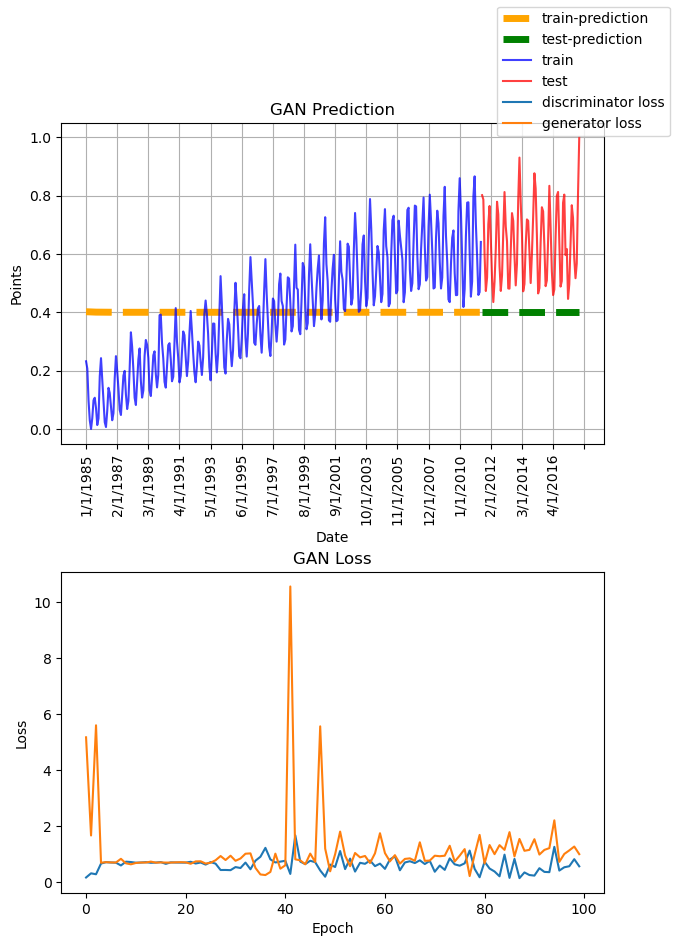

In [5]:
# instantiate model
generator_kwargs = {
    'input_dim': data['sequence_length'],
    'hidden_dim': 100,
    'output_dim': 1,
}
discriminator_kwargs = {
    'input_dim': 1,
    'hidden_dim': 50,
}

generator = Generator(**generator_kwargs)
discriminator = Discriminator(**discriminator_kwargs)

# run train/evaluation
evaluation_kwargs = {
    'model': None,
    'lr': None,
    'generator': generator,
    'discriminator': discriminator,
    'num_epochs': 100,
    'g_lr': 0.001,
    'd_lr': 0.001,
    'model_type': 'gan',
}
evaluate_model(**evaluation_kwargs)